## **Student Performance Analysis**
This notebook analyzes the factors affecting student exam performance using data visualization and statistical summaries. The tools used are pandas, numpy, matplotlib, and seaborn — no machine learning or external libraries.

## **Data Loading & Exploration**

- pandas and numpy are used for data manipulation and numerical operations.

- matplotlib and seaborn are for data visualization.

- Plotting is styled with white grid for better readability.



In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- Loads your dataset (replace "StudentPerformance.csv" with the actual file path).

- **.head()** shows the first 5 rows to get a quick look at the data.

In [83]:
# Load dataset
df = pd.read_csv("StudentPerformance.csv")


In [84]:
# Preview data
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [85]:
# show the all columns name store in the list
df.columns.to_list()

['Hours_Studied',
 'Attendance',
 'Parental_Involvement',
 'Access_to_Resources',
 'Extracurricular_Activities',
 'Sleep_Hours',
 'Previous_Scores',
 'Motivation_Level',
 'Internet_Access',
 'Tutoring_Sessions',
 'Family_Income',
 'Teacher_Quality',
 'School_Type',
 'Peer_Influence',
 'Physical_Activity',
 'Learning_Disabilities',
 'Parental_Education_Level',
 'Distance_from_Home',
 'Gender',
 'Exam_Score']

## **.info() displays column types and missing values.**

In [86]:
# Show all information about columns / Get dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

## **.dtypes check the each each columns data types**


In [87]:
df.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

## **Unique Values & Value Counts**

- Checks how many unique values each column has — helpful to distinguish categorical from numerical.

- Shows how many times each value occurs — great for understanding distributions in categorical features.

In [88]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

# %%

# Value counts
for col in df.columns:
    print(f"\nValue counts for {col}:\n{df[col].value_counts(dropna=False)}")

Hours_Studied: 41 unique values
Attendance: 41 unique values
Parental_Involvement: 3 unique values
Access_to_Resources: 3 unique values
Extracurricular_Activities: 2 unique values
Sleep_Hours: 7 unique values
Previous_Scores: 51 unique values
Motivation_Level: 3 unique values
Internet_Access: 2 unique values
Tutoring_Sessions: 9 unique values
Family_Income: 3 unique values
Teacher_Quality: 3 unique values
School_Type: 2 unique values
Peer_Influence: 3 unique values
Physical_Activity: 7 unique values
Learning_Disabilities: 2 unique values
Parental_Education_Level: 3 unique values
Distance_from_Home: 3 unique values
Gender: 2 unique values
Exam_Score: 45 unique values

Value counts for Hours_Studied:
Hours_Studied
20    465
19    441
21    431
23    411
22    402
18    401
17    381
24    357
16    351
15    315
25    289
14    269
26    263
27    229
13    218
12    192
28    171
11    146
29    134
30    123
10     94
9      86
31     77
8      58
32     54
7      51
33     40
34     2

In [89]:
#Check all missing values
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [90]:
# Drop rows with missing values
df = df.dropna()



**.describe()** gives summary statistics (mean, std, min, etc.) for both numeric and categorical columns.



In [91]:
df.describe(include='all')

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
count,6378.000000,6378.000000,6378,6378,6378,6378.000000,6378.000000,6378,6378,6378.000000,6378,6378,6378,6378,6378.000000,6378,6378,6378,6378,6378.000000
unique,NaN,NaN,3,3,2,NaN,NaN,3,2,NaN,3,3,2,3,NaN,2,3,3,2,NaN
top,NaN,NaN,Medium,Medium,Yes,NaN,NaN,Medium,Yes,NaN,Low,Medium,Public,Positive,NaN,No,High School,Near,Male,NaN
freq,NaN,NaN,3251,3204,3807,NaN,NaN,3237,5893,NaN,2582,3826,4434,2553,NaN,5710,3159,3801,3688,NaN
mean,19.977109,80.020853,NaN,NaN,NaN,7.034964,75.066165,NaN,NaN,1.495296,NaN,NaN,NaN,NaN,2.972719,NaN,NaN,NaN,NaN,67.252117
std,5.985460,11.550723,NaN,NaN,NaN,1.468033,14.400389,NaN,NaN,1.233984,NaN,NaN,NaN,NaN,1.028926,NaN,NaN,NaN,NaN,3.914217
min,1.000000,60.000000,NaN,NaN,NaN,4.000000,50.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,55.000000
25%,16.000000,70.000000,NaN,NaN,NaN,6.000000,63.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,65.000000
50%,20.000000,80.000000,NaN,NaN,NaN,7.000000,75.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,67.000000
75%,24.000000,90.000000,NaN,NaN,NaN,8.000000,88.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,69.000000


## **Univariate Analysis (Histograms)**

- Shows the distribution of each numeric variable.

- kde=True adds a smoothed line showing the distribution shape.

- Helps identify skewness, outliers, or unusual patterns.



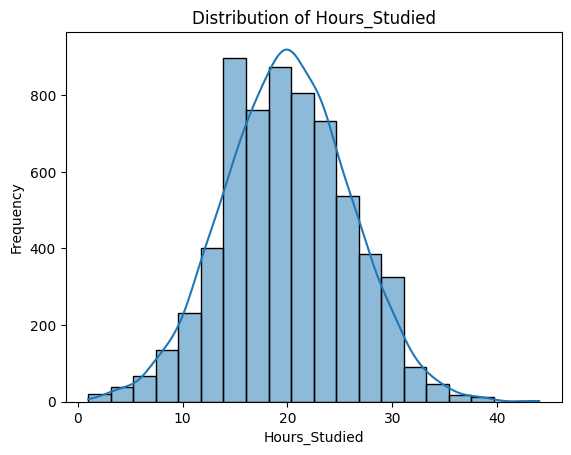

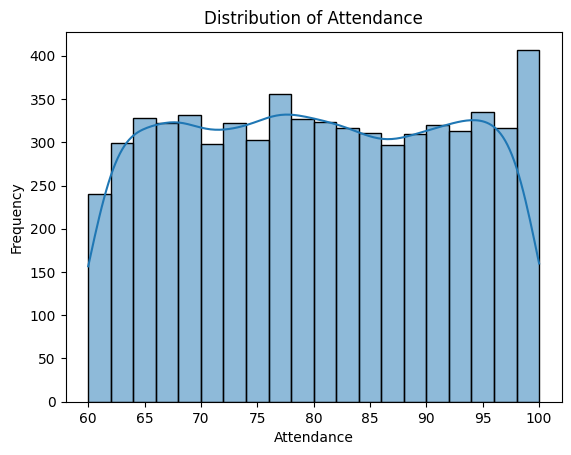

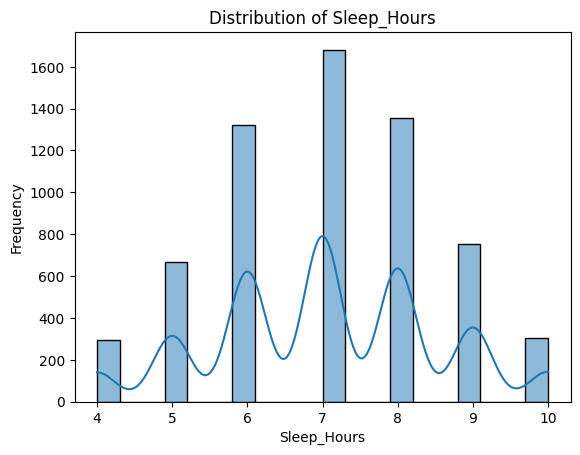

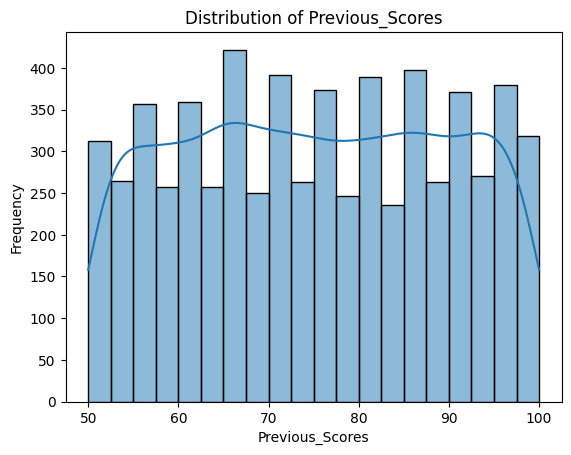

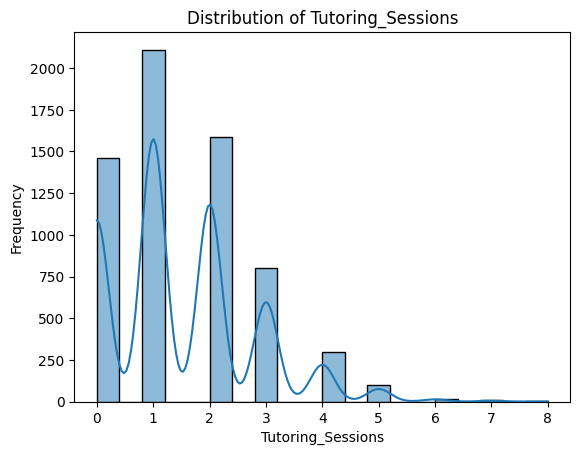

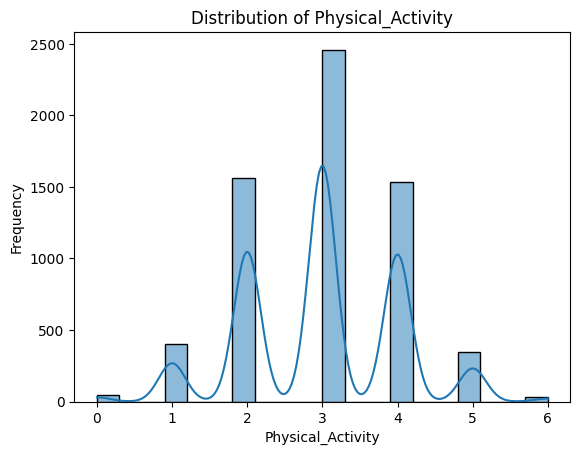

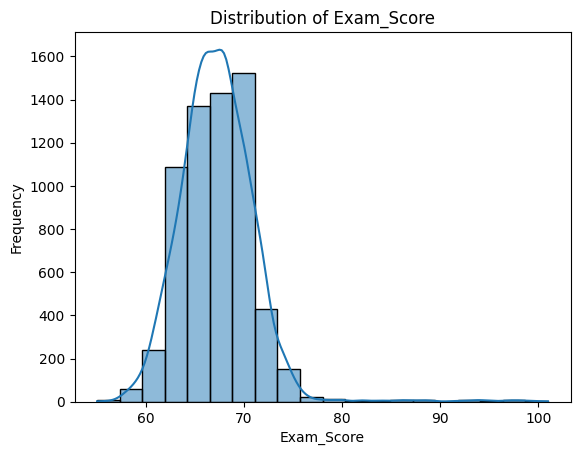

In [92]:

numeric_columns = df.select_dtypes(include=np.number).columns

for col in numeric_columns:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

## **Boxplots for Outliers**

- Boxplots show the median, quartiles, and detect outliers as individual points.

- Helps you understand the spread and detect extreme values.

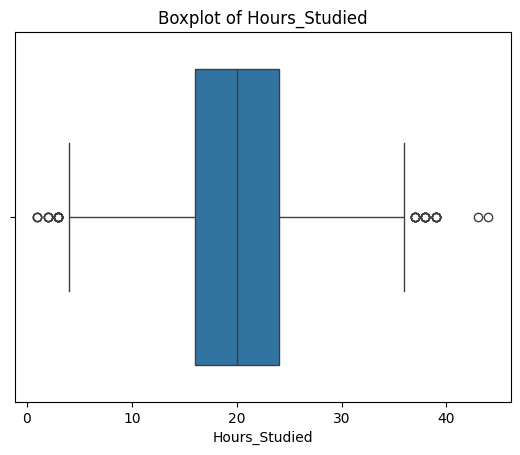

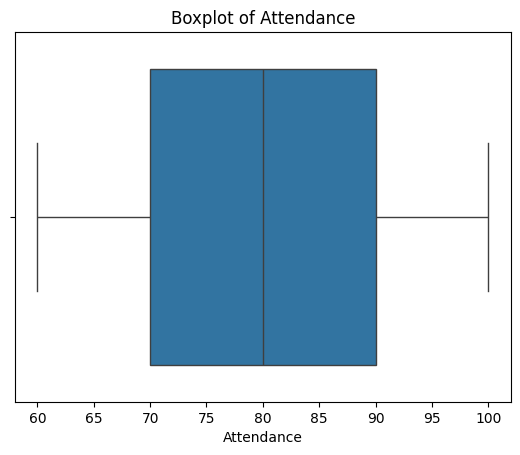

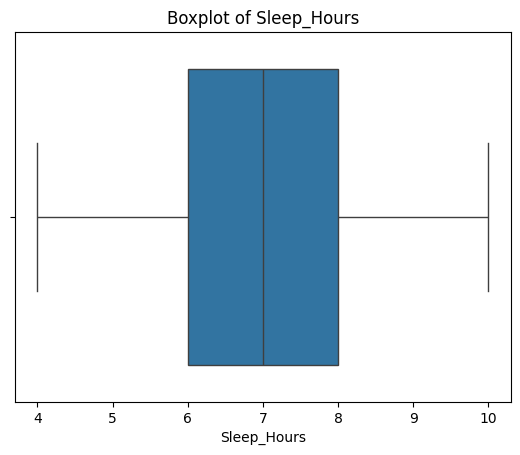

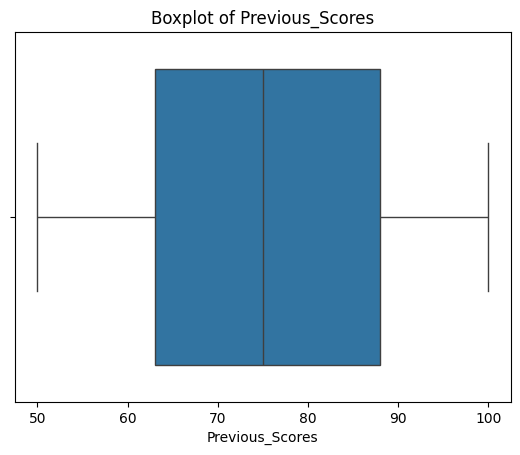

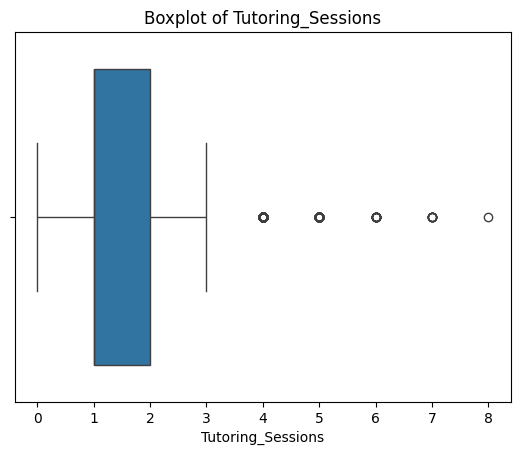

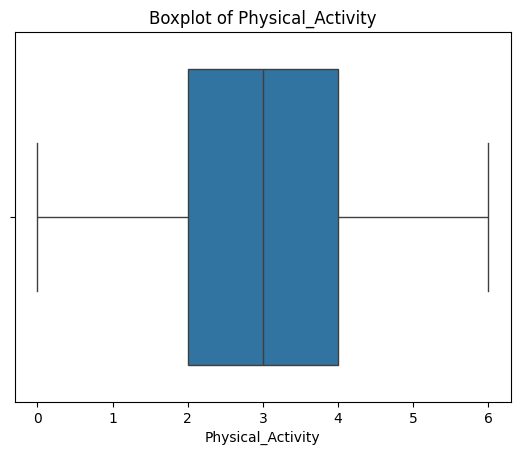

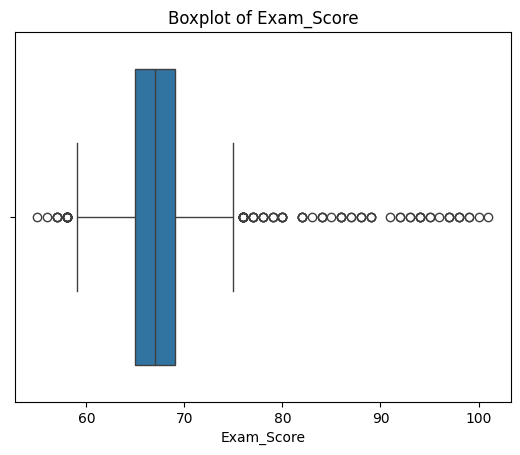

In [93]:
for col in numeric_columns:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

## **Correlation Matrix**

- Shows correlation coefficients between all numerical columns.

- Values close to +1 or -1 indicate strong relationships.

- Especially useful for identifying factors most correlated with Exam Score.


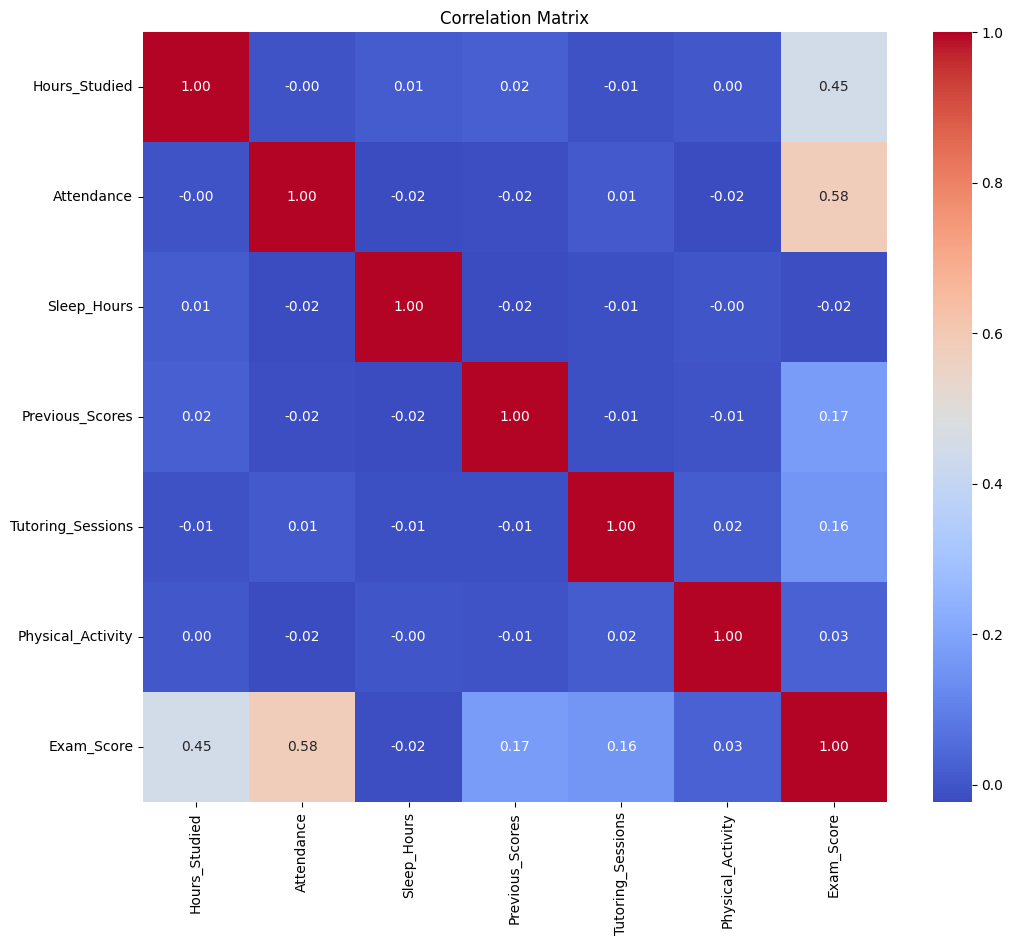

In [94]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


## **Scatterplots with Exam Score**

- Visualizes the relationship between each feature and the final exam score.

- Helps identify linear or non-linear patterns (e.g., "more sleep = better scores").

- 🧠 Observation: Useful for spotting trends and whether features are good predictors of performance.

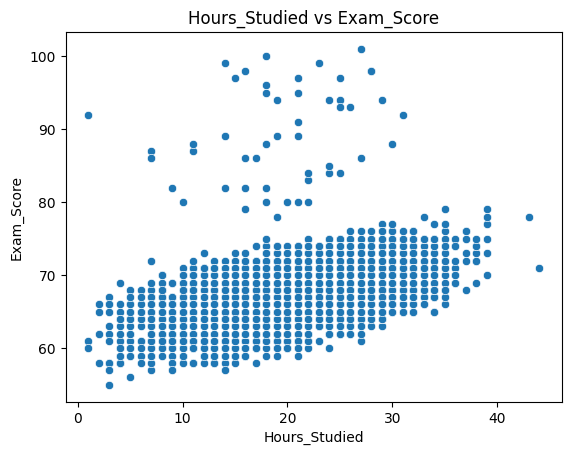

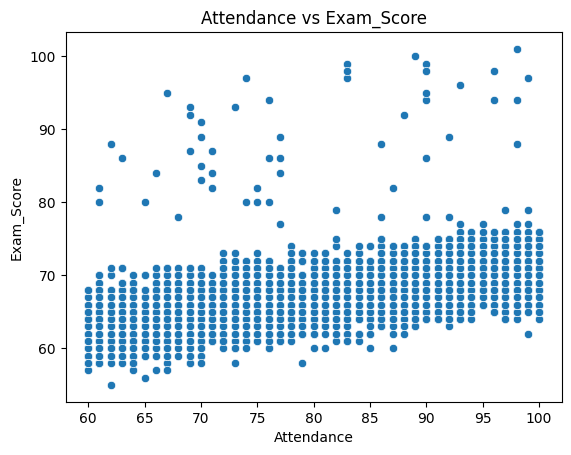

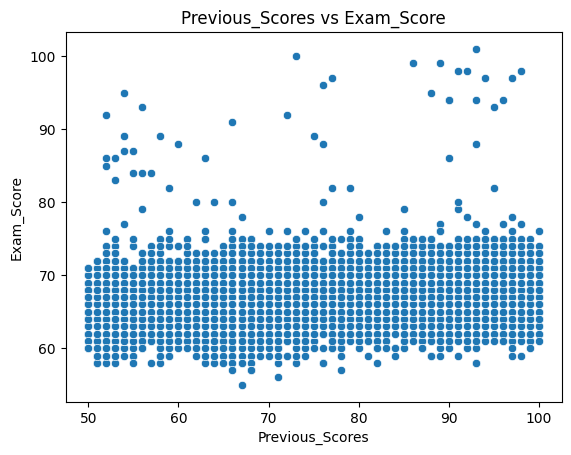

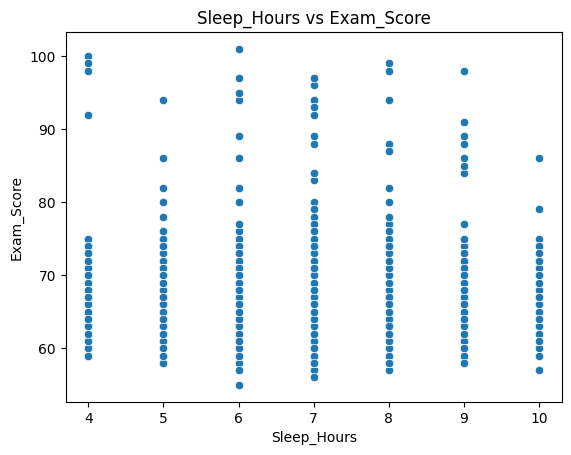

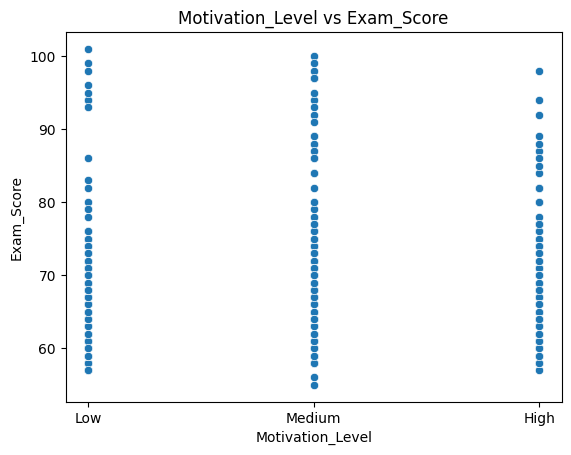

In [95]:
important_features = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Sleep_Hours', 'Motivation_Level']

for col in important_features:
    plt.figure()
    sns.scatterplot(x=col, y='Exam_Score', data=df)
    plt.title(f"{col} vs Exam_Score")
    plt.show()


## **11. Grouped Averages (Mean Exam Score)**

- Shows average exam score for each group.

- understand how categories like gender, school type, or parental involvement affect outcomes.

- **🧠 Observation:** If a group has significantly lower scores, it could be a focus area for intervention.

In [96]:
df.groupby('Gender')['Exam_Score'].mean()

Gender
Female    67.274721
Male      67.235629
Name: Exam_Score, dtype: float64

In [97]:
df.groupby('Parental_Involvement')['Exam_Score'].mean()


Parental_Involvement
High      68.112200
Low       66.378776
Medium    67.113196
Name: Exam_Score, dtype: float64

In [98]:
df.groupby('School_Type')['Exam_Score'].mean()


School_Type
Private    67.316358
Public     67.223951
Name: Exam_Score, dtype: float64

## **2. Save Cleaned Dataset**

- Saves  cleaned and encoded dataset to a new CSV file — useful for future analysis or modeling.

In [99]:
df.to_csv("cleaned_dataset.csv", index=False)
